In [1]:
import sys
sys.path.append('/Users/vdk/Software/code/')
import h5py
import pandas as pd
from astropy.table import Table, vstack
import numpy as np
from scipy.interpolate import interp1d
from ctapipe.io import EventSource
import statsmodels.api as sm
from ctapipe.visualization import CameraDisplay
import matplotlib.pyplot as plt
import glob
from python_modules.muonpipe import usefull_func
import seaborn as sns
from ctapipe.image import tailcuts_clean
import scipy.stats as stats
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import glob
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#e377c2',  # raspberry yogurt pink
    '#8c564b',  # chestnut brown
    'k'
]

start_date_2019 = datetime.strptime("2019-11-25 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2020 = datetime.strptime("2020-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2020 = datetime.strptime("2020-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2021 = datetime.strptime("2021-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2021 = datetime.strptime("2021-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2022 = datetime.strptime("2022-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2022 = datetime.strptime("2022-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2023 = datetime.strptime("2023-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2023 = datetime.strptime("2023-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2024 = datetime.strptime("2024-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2024 = datetime.strptime("2024-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
filename = '/Users/vdk/muons2024/data/for_comparison/nsb_tuning/triple_tuning/run101_muon.simtel.gz'
source = EventSource(filename, max_events = 1)
camgeom = source.subarray.tel[1].camera.geometry

import matplotlib.style as mplstyle

mplstyle.use('test_style.mplstyle')


In [2]:
size_outside_cut = 500
muon_efficiency_cut = 1
min_impact = 2.2199933748101555
max_impact = 9.983608702234397

## Data loading

In [3]:
muon_files = glob.glob('/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/*')
print(sorted(muon_files))

df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)] 
df_all_data = pd.concat(df_files, ignore_index=True)
df_good_data_real = df_all_data[(df_all_data['muon_efficiency'] < muon_efficiency_cut) & (df_all_data['size_outside'] < size_outside_cut)]
del(df_all_data)
df_good_data_real

['/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/1_0-25k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/2_25-50k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/3_50-75k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/4_75-100k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/5_100-125k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/6_125-150k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/7_150-175k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/8_0-600fits_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/91_1200-1800fits_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/92_v010_1stHalf_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/93_v010_2ndHalf_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/94_600-1200fits_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/2880875785.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/2880875785.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/2880875785.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/2880875785.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
0,60.0,1.574637e+09,-1.0,2311.1147,0.000000,-0.975512,-0.354570,1.038939,0.066076,1.0,...,6.481509,6.331281,1.387386,0.059634,-0.111103,0.311915,371.0,0.039351,13.0,0.0
1,287.0,1.574637e+09,-1.0,2646.7896,0.000000,0.353987,0.463572,1.192394,0.039972,1.0,...,6.638931,0.768292,6.594326,0.042449,0.208130,0.457135,493.0,0.104818,15.0,0.0
2,815.0,1.574637e+09,-1.0,2682.9595,0.000000,0.200454,0.503540,1.155244,0.050399,1.0,...,5.826689,5.821747,-0.239914,0.049087,0.312026,0.410487,478.0,0.048045,17.0,0.0
3,1248.0,1.574637e+09,-1.0,2802.3580,0.000000,0.719930,0.076793,1.203815,0.034111,1.0,...,4.560473,1.679653,4.239891,0.038754,0.229592,0.123887,499.0,0.371614,19.0,0.0
4,1573.0,1.574637e+09,-1.0,2121.7700,0.000000,-0.878445,0.215899,1.024937,0.093730,1.0,...,8.680637,-3.656715,-7.872858,0.077182,-0.073894,0.545917,358.0,0.000755,14.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31308385,4843910.0,1.719445e+09,-1.0,1624.1024,8.637733,-0.659971,0.876965,0.848291,0.116848,1.0,...,9.798134,-9.516054,2.334126,0.095898,-0.030282,-0.441889,251.0,0.703649,17.0,0.0
31308386,4849315.0,1.719445e+09,-1.0,2414.9480,0.000000,-0.454369,-0.084192,1.216073,0.040280,1.0,...,7.001510,-5.435892,4.412734,0.042521,0.049803,0.318690,509.0,0.236881,15.0,0.0
31308387,4849722.0,1.719445e+09,-1.0,1970.0897,0.000000,0.253036,0.191820,1.140060,0.090437,1.0,...,9.286253,-0.358254,9.279340,0.067051,-0.067978,-0.366449,449.0,0.183407,18.0,0.0
31308388,4850938.0,1.719445e+09,-1.0,1704.5847,0.000000,0.259656,1.009226,0.828704,0.082265,1.0,...,3.947441,3.907940,-0.557041,0.068710,0.337672,-0.121390,235.0,0.282522,18.0,0.0


## Cuts

In [4]:
ring_containment_cut = 0.3
ring_completeness_cut = 0.7
min_radius_cut = 0.95
max_radius_cut = 1.15


df_real_data_cut_2020 = df_good_data_real[ 
    (df_good_data_real['ring_completeness'] > ring_completeness_cut) &
    (df_good_data_real['ring_containment'] > ring_containment_cut) &
    (df_good_data_real['ring_radius'] > min_radius_cut) &  
    (df_good_data_real['ring_radius'] < max_radius_cut) &  
    (df_good_data_real['event_time'] > start_date_2020) &
    (df_good_data_real['event_time'] < end_date_2020)
]

df_real_data_cut_2021 = df_good_data_real[ 
    (df_good_data_real['ring_completeness'] > ring_completeness_cut) &
    (df_good_data_real['ring_containment'] > ring_containment_cut) &
    (df_good_data_real['ring_radius'] > min_radius_cut) &  
    (df_good_data_real['ring_radius'] < max_radius_cut) &  
    (df_good_data_real['event_time'] > start_date_2021) &
    (df_good_data_real['event_time'] < end_date_2021)
]

df_real_data_cut_2022 = df_good_data_real[ 
    (df_good_data_real['ring_completeness'] > ring_completeness_cut) &
    (df_good_data_real['ring_containment'] > ring_containment_cut) &
    (df_good_data_real['ring_radius'] > min_radius_cut) &  
    (df_good_data_real['ring_radius'] < max_radius_cut) &  
    (df_good_data_real['event_time'] > start_date_2022) &
    (df_good_data_real['event_time'] < end_date_2022)
]

df_real_data_cut_2023 = df_good_data_real[ 
    (df_good_data_real['ring_completeness'] > ring_completeness_cut) &
    (df_good_data_real['ring_containment'] > ring_containment_cut) &
    (df_good_data_real['ring_radius'] > min_radius_cut) &  
    (df_good_data_real['ring_radius'] < max_radius_cut) &  
    (df_good_data_real['event_time'] > start_date_2023) &
    (df_good_data_real['event_time'] < end_date_2023)
]

df_real_data_cut_2024 = df_good_data_real[ 
    (df_good_data_real['ring_completeness'] > ring_completeness_cut) &
    (df_good_data_real['ring_containment'] > ring_containment_cut) &
    (df_good_data_real['ring_radius'] > min_radius_cut) &  
    (df_good_data_real['ring_radius'] < max_radius_cut) &  
    (df_good_data_real['event_time'] > start_date_2024) &
    (df_good_data_real['event_time'] < end_date_2024)
]






print(len(df_real_data_cut_2022))

972672


In [5]:
print(f"2020 year: Size of the cutted dataset  {len(df_real_data_cut_2020)} vs whole dataset "
      f"{len(df_good_data_real[(df_good_data_real['event_time'] > start_date_2020) & (df_good_data_real['event_time'] < end_date_2020)])} "
      f"which means {round(len(df_real_data_cut_2020)/len(df_good_data_real[(df_good_data_real['event_time'] > start_date_2020) & (df_good_data_real['event_time'] < end_date_2020)])*100,3)} %")

print(f"2021 year: Size of the cutted dataset  {len(df_real_data_cut_2021)} vs whole dataset "
      f"{len(df_good_data_real[(df_good_data_real['event_time'] > start_date_2021) & (df_good_data_real['event_time'] < end_date_2021)])} "
      f"which means {round(len(df_real_data_cut_2021)/len(df_good_data_real[(df_good_data_real['event_time'] > start_date_2021) & (df_good_data_real['event_time'] < end_date_2021)])*100,3)} %")

print(f"2022 year: Size of the cutted dataset {len(df_real_data_cut_2022)} vs whole dataset "
      f"{len(df_good_data_real[(df_good_data_real['event_time'] > start_date_2022) & (df_good_data_real['event_time'] < end_date_2022)])} "
      f"which means {round(len(df_real_data_cut_2022)/len(df_good_data_real[(df_good_data_real['event_time'] > start_date_2022) & (df_good_data_real['event_time'] < end_date_2022)])*100,3)} %")
      
print(f"2023 year: Size of the cutted dataset {len(df_real_data_cut_2023)} vs whole dataset "
      f"{len(df_good_data_real[(df_good_data_real['event_time'] > start_date_2023) & (df_good_data_real['event_time'] < end_date_2023)])} "
      f"which means {round(len(df_real_data_cut_2023)/len(df_good_data_real[(df_good_data_real['event_time'] > start_date_2023) & (df_good_data_real['event_time'] < end_date_2023)])*100,3)} %")

print(f"2024 year: Size of the cutted dataset  {len(df_real_data_cut_2024)} vs whole dataset " 
      f"{len(df_good_data_real[(df_good_data_real['event_time'] > start_date_2024) & (df_good_data_real['event_time'] < end_date_2024)])} "
      f"which means {round(len(df_real_data_cut_2024)/len(df_good_data_real[(df_good_data_real['event_time'] > start_date_2024) & (df_good_data_real['event_time'] < end_date_2024)])*100,3)} %")

2020 year: Size of the cutted dataset  169473 vs whole dataset 854903 which means 19.824 %
2021 year: Size of the cutted dataset  488538 vs whole dataset 2583827 which means 18.908 %
2022 year: Size of the cutted dataset 972672 vs whole dataset 7920965 which means 12.28 %
2023 year: Size of the cutted dataset 1196072 vs whole dataset 11948822 which means 10.01 %
2024 year: Size of the cutted dataset  760928 vs whole dataset 7939138 which means 9.585 %


## Plotting regression data

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/1383088320.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)


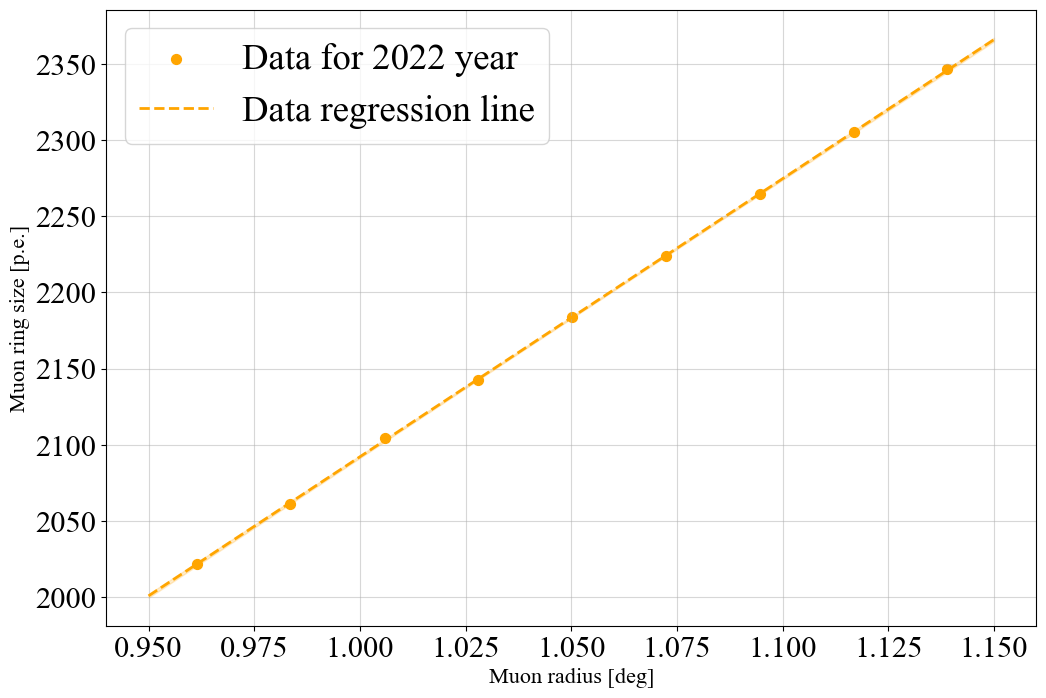

In [6]:
year_value = 2022

data_run = eval(f"df_real_data_cut_{year_value}")

bins = np.linspace(min_radius_cut, max_radius_cut, 10)
# Generate x values for the regression lines
x_values = np.linspace(bins.min(), bins.max(), 300)
x_values_with_const = sm.add_constant(x_values)


# Bin the data for Run
data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)
binned_run = data_run.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})
binned_run['constant'] = 1
model_run = sm.OLS(binned_run['ring_size'], binned_run[['constant', 'ring_radius']]).fit()
y_values_run = model_run.predict(x_values_with_const)
prediction_run = model_run.get_prediction(x_values_with_const)
conf_int_run = prediction_run.conf_int()


# Plotting
plt.figure(figsize=(12, 8))



# Plotting Data Run
plt.scatter(binned_run['ring_radius'], binned_run['ring_size'], color='orange', label=f'Data for {year_value} year', s=50)
plt.plot(x_values, y_values_run, color='orange', linestyle='--', label='Data regression line')
plt.fill_between(x_values, conf_int_run[:, 0], conf_int_run[:, 1], color='orange', alpha=0.2)


# Adding labels and legend
plt.xlabel('Muon radius [deg]',fontsize=16)
plt.ylabel('Muon ring size [p.e.]',fontsize=16)
plt.legend()
#plt.ylim(1800,3000)
plt.grid(alpha=0.5)
#plt.title(f"Quality cuts containment > {ring_containment_cut} completeness > {ring_completeness_cut}")
#plt.show()
#plt.savefig(f'/Users/vdk/muons2024/images/PlanPaper/cuts_investigation/2022tune_size_vs_radius_{year_value}year_cont{ring_containment_cut}_comp{ring_completeness_cut}.pdf', dpi=200, format='pdf', bbox_inches='tight')

In [7]:
np.mean(binned_run['ring_size'])

2183.7303673310776

In [8]:
binned_run['ring_size'][7]

2305.263180694799

In [9]:
df_real_data_cut_2022

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample,binned_radius
3488213,4355.0,1.646080e+09,-1.0,2064.6797,0.0,0.099376,-0.633696,1.044444,0.074663,True,...,3.054592,-4.630664,0.063052,0.020298,-0.327357,375.0,0.419557,10.0,0.0,4
3488216,11605.0,1.646080e+09,-1.0,2308.7507,0.0,0.649612,0.518713,1.036464,0.075418,True,...,-2.262237,1.327291,0.060362,-0.017920,0.118101,371.0,0.462278,12.0,0.0,3
3488218,16812.0,1.646080e+09,-1.0,2308.5774,0.0,0.008735,0.921088,1.108196,0.097587,True,...,-4.126609,-6.007359,0.076010,0.568425,0.561077,428.0,0.183570,10.0,0.0,7
3488225,32161.0,1.646080e+09,-1.0,2326.5063,0.0,-0.831113,-0.507848,1.132384,0.059766,True,...,-6.615294,-2.487973,0.053305,-0.218008,0.232923,443.0,0.333941,10.0,0.0,8
3488227,36811.0,1.646080e+09,-1.0,2292.1080,0.0,-0.746555,0.838188,1.132697,0.052849,True,...,-0.119103,-4.018341,0.046801,0.188120,0.051929,406.0,0.607657,9.0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24901278,6469242.0,1.671851e+09,-1.0,1761.8099,0.0,-0.568509,0.854928,0.990165,0.082566,True,...,0.730814,3.900725,0.062342,0.197748,-0.137741,335.0,0.501498,10.0,0.0,1
24901279,6469838.0,1.671851e+09,-1.0,2382.5137,0.0,-0.949701,-0.537579,1.077080,0.060089,True,...,3.357239,-1.735108,0.051285,-0.059828,0.695431,395.0,0.392847,10.0,0.0,5
24901280,6469983.0,1.671851e+09,-1.0,2421.3680,0.0,-0.177507,0.453856,1.084797,0.051190,True,...,3.984712,-3.676147,0.046211,-0.065302,0.031389,407.0,0.111527,12.0,0.0,6
24901291,6482491.0,1.671851e+09,-1.0,2384.4100,0.0,-0.766999,0.816114,1.055209,0.081247,True,...,3.636496,0.156462,0.064338,-0.117091,0.011194,366.0,0.372527,10.0,0.0,4


In [10]:
# Convert event_time to datetime
df_real_data_cut_2022['event_time'] = pd.to_datetime(df_real_data_cut_2022['event_time'], unit='s')

# Extract year and month from event_time
df_real_data_cut_2022['year'] = df_real_data_cut_2022['event_time'].dt.year
df_real_data_cut_2022['month'] = df_real_data_cut_2022['event_time'].dt.month

# Filter for the year 2022 (if not already filtered)
df_real_data_cut_2022 = df_real_data_cut_2022[df_real_data_cut_2022['year'] == 2022]

# Group by month and iterate through groups
grouped = df_real_data_cut_2022.groupby('month')

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/3087551807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_data_cut_2022['event_time'] = pd.to_datetime(df_real_data_cut_2022['event_time'], unit='s')
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/3087551807.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_data_cut_2022['year'] = df_real_data_cut_2022['event_time'].dt.year
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/3087551807.py:6: S

### Date cut only for 2022 year

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/847109980.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/847109980.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)


No data for month 1
Value for the 1.05 deg in month 2 = 2319.864819512195
Value for the 1.05 deg in month 3 = 2351.9457654296543
Value for the 1.05 deg in month 4 = 2338.875318432781
Value for the 1.05 deg in month 5 = 2367.6554539364597
Value for the 1.05 deg in month 6 = 2321.2139282845014
No data for month 7
No data for month 8
Value for the 1.05 deg in month 9 = 2219.058294383291
Value for the 1.05 deg in month 10 = 2208.9258111427707
Value for the 1.05 deg in month 11 = 2306.330442318493
Value for the 1.05 deg in month 12 = 2304.0012169644547


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/847109980.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/847109980.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykern

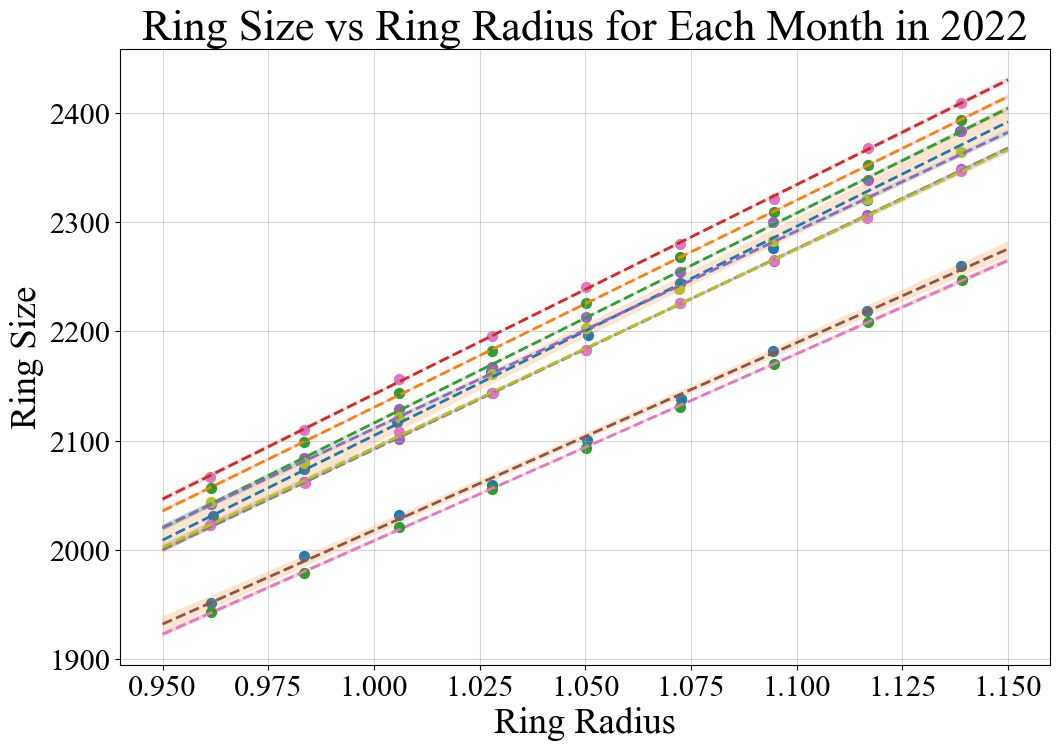

In [11]:

# Convert event_time to datetime
df_real_data_cut_2022['event_time'] = pd.to_datetime(df_real_data_cut_2022['event_time'], unit='s')

# Extract year and month from event_time
df_real_data_cut_2022['year'] = df_real_data_cut_2022['event_time'].dt.year
df_real_data_cut_2022['month'] = df_real_data_cut_2022['event_time'].dt.month

# Filter for the year 2022 (if not already filtered)
df_real_data_cut_2022 = df_real_data_cut_2022[df_real_data_cut_2022['year'] == 2022]

# Create a list of all months
all_months = range(1, 13)

# Define x_values for plotting
x_values = np.linspace(min_radius_cut, max_radius_cut, 100)  # adjust based on your data range
x_values_with_const = sm.add_constant(x_values)

plt.figure(figsize=(12, 8))
mean_2022 = [] 
size_bin_2022 = [] 
# Define bins
bins = np.linspace(min_radius_cut, max_radius_cut, 10)

for month in all_months:
    if month in df_real_data_cut_2022['month'].unique():
        data_run = df_real_data_cut_2022[df_real_data_cut_2022['month'] == month]
        # Bin the data for the current month
        data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)
        binned_run = data_run.groupby('binned_radius').agg({
            'ring_radius': 'mean',
            'ring_size': 'mean'
        })
        binned_run['constant'] = 1

        # Fit the model
        model_run = sm.OLS(binned_run['ring_size'], binned_run[['constant', 'ring_radius']]).fit()
        intercept = model_run.params['constant']
        y_values_run = model_run.predict(x_values_with_const)
        prediction_run = model_run.get_prediction(x_values_with_const)
        conf_int_run = prediction_run.conf_int()

        # Print the intercept for the current month
        #print(f'Intercept for month {month}: {intercept}')
        print(f'Value for the 1.05 deg in month {month} = {binned_run["ring_size"][7]}')
        mean_2022.append(binned_run['ring_size'].mean())
        size_bin_2022.append(binned_run["ring_size"][7])
        # Plotting
        plt.scatter(binned_run['ring_radius'], binned_run['ring_size'], label=f'Data for month {month}', s=50)
        plt.plot(x_values, y_values_run, linestyle='--', label=f'Month {month} regression line')
        plt.fill_between(x_values, conf_int_run[:, 0], conf_int_run[:, 1], alpha=0.2)
    else:
        print(f"No data for month {month}")

# Customize the plot
plt.xlabel('Ring Radius')
plt.ylabel('Ring Size')
#plt.legend()
plt.title('Ring Size vs Ring Radius for Each Month in 2022')
plt.grid(alpha=0.5)
plt.show()

In [12]:
binned_run['ring_size'][4]

2183.1644855896557

### Data for 2023 year

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/2910717614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_data_cut_2023['event_time'] = pd.to_datetime(df_real_data_cut_2023['event_time'], unit='s')
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/2910717614.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_data_cut_2023['year'] = df_real_data_cut_2023['event_time'].dt.year
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/2910717614.py:6: S

Value for the 1.05 deg in month 1 = 2338.30931626363
Value for the 1.05 deg in month 2 = 2267.667800224479
Value for the 1.05 deg in month 3 = 2280.523504122414
Value for the 1.05 deg in month 4 = 2286.7851514110926
No data for month 5
No data for month 6
No data for month 7
No data for month 8
Value for the 1.05 deg in month 9 = 2270.921207807118
Value for the 1.05 deg in month 10 = 2204.7110688660737
Value for the 1.05 deg in month 11 = 2247.9552468504457
Value for the 1.05 deg in month 12 = 2272.113367734966


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/2910717614.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/2910717614.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipyke

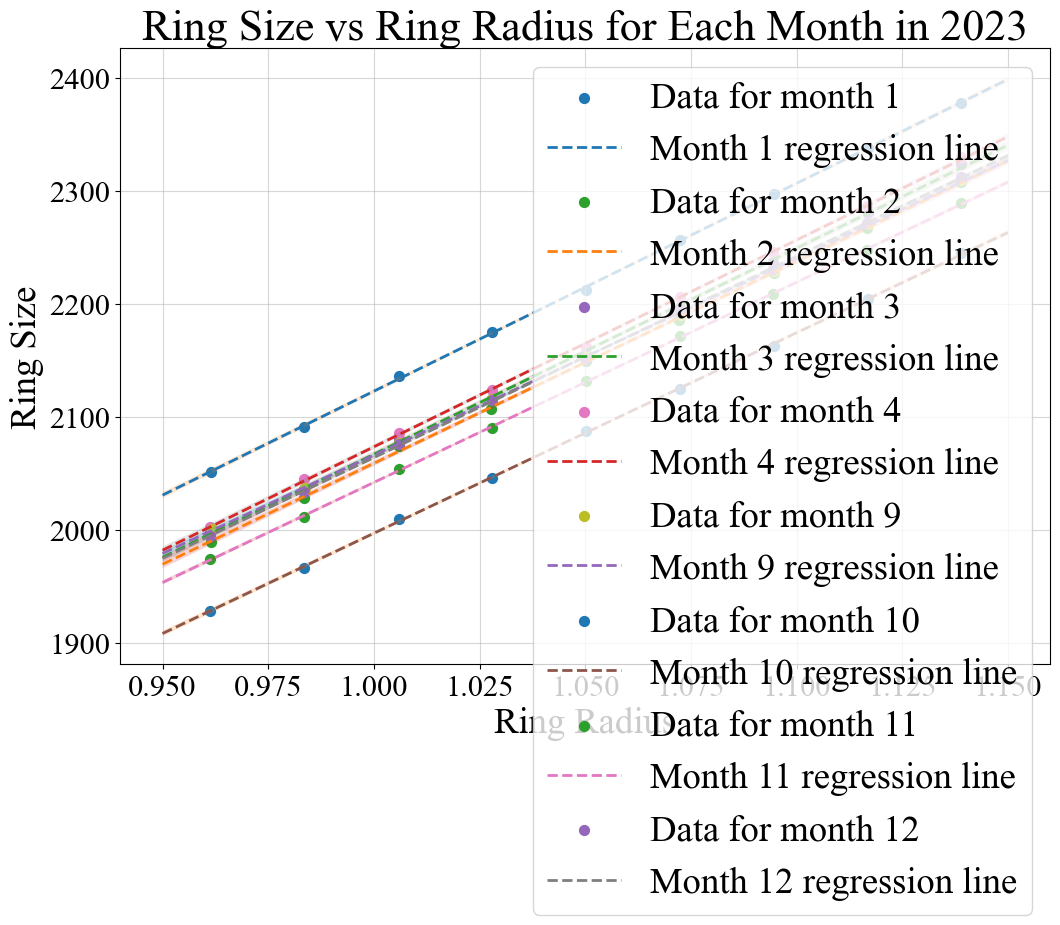

In [13]:

# Convert event_time to datetime
df_real_data_cut_2023['event_time'] = pd.to_datetime(df_real_data_cut_2023['event_time'], unit='s')

# Extract year and month from event_time
df_real_data_cut_2023['year'] = df_real_data_cut_2023['event_time'].dt.year
df_real_data_cut_2023['month'] = df_real_data_cut_2023['event_time'].dt.month

# Filter for the year 2022 (if not already filtered)
df_real_data_cut_2023 = df_real_data_cut_2023[df_real_data_cut_2023['year'] == 2023]

# Create a list of all months
all_months = range(1, 13)

# Define x_values for plotting
x_values = np.linspace(min_radius_cut, max_radius_cut, 100)  # adjust based on your data range
x_values_with_const = sm.add_constant(x_values)

plt.figure(figsize=(12, 8))
mean_2023 = []
size_bin_2023 = []  
# Define bins
bins = np.linspace(min_radius_cut, max_radius_cut, 10)

for month in all_months:
    if month in df_real_data_cut_2023['month'].unique():
        data_run = df_real_data_cut_2023[df_real_data_cut_2023['month'] == month]
        # Bin the data for the current month
        data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)
        binned_run = data_run.groupby('binned_radius').agg({
            'ring_radius': 'mean',
            'ring_size': 'mean'
        })
        binned_run['constant'] = 1

        # Fit the model
        model_run = sm.OLS(binned_run['ring_size'], binned_run[['constant', 'ring_radius']]).fit()
        intercept = model_run.params['constant']
        y_values_run = model_run.predict(x_values_with_const)
        prediction_run = model_run.get_prediction(x_values_with_const)
        conf_int_run = prediction_run.conf_int()

        # Print the intercept for the current month
        #print(f'Intercept for month {month}: {intercept}')
        print(f'Value for the 1.05 deg in month {month} = {binned_run["ring_size"][7]}')
        mean_2023.append(binned_run['ring_size'].mean())
        size_bin_2023.append(binned_run["ring_size"][7])
        # Plotting
        plt.scatter(binned_run['ring_radius'], binned_run['ring_size'], label=f'Data for month {month}', s=50)
        plt.plot(x_values, y_values_run, linestyle='--', label=f'Month {month} regression line')
        plt.fill_between(x_values, conf_int_run[:, 0], conf_int_run[:, 1], alpha=0.2)
    else:
        print(f"No data for month {month}")

# Customize the plot
plt.xlabel('Ring Radius')
plt.ylabel('Ring Size')
plt.legend()
plt.title('Ring Size vs Ring Radius for Each Month in 2023')
plt.grid(alpha=0.5)
plt.show()

### Data for 2021 year

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/1320924792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_data_cut_2021['event_time'] = pd.to_datetime(df_real_data_cut_2021['event_time'], unit='s')
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/1320924792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_data_cut_2021['year'] = df_real_data_cut_2021['event_time'].dt.year
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/1320924792.py:6: S

Value for the 1.05 deg in month 1 = 2346.7151167938932
Value for the 1.05 deg in month 2 = 2408.076191778015
Value for the 1.05 deg in month 3 = 2427.1080029302766
Value for the 1.05 deg in month 4 = 2362.4340729885057
Value for the 1.05 deg in month 5 = 2333.242605425143
Value for the 1.05 deg in month 6 = 2369.5783921311477
No data for month 7
Value for the 1.05 deg in month 8 = 2351.459663307877
Value for the 1.05 deg in month 9 = 2342.6019103520757
No data for month 10
No data for month 11
No data for month 12


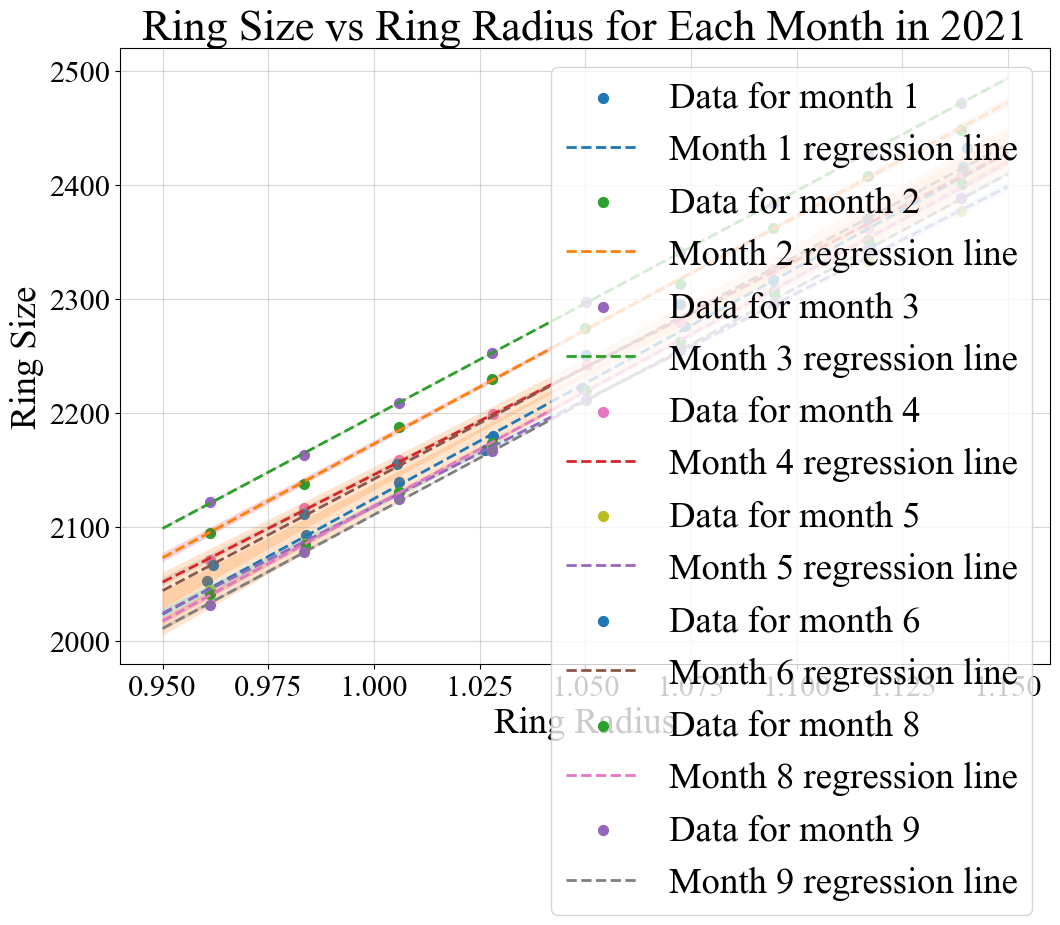

In [14]:

# Convert event_time to datetime
df_real_data_cut_2021['event_time'] = pd.to_datetime(df_real_data_cut_2021['event_time'], unit='s')

# Extract year and month from event_time
df_real_data_cut_2021['year'] = df_real_data_cut_2021['event_time'].dt.year
df_real_data_cut_2021['month'] = df_real_data_cut_2021['event_time'].dt.month

# Filter for the year 2022 (if not already filtered)
df_real_data_cut_2021 = df_real_data_cut_2021[df_real_data_cut_2021['year'] == 2021]

# Create a list of all months
all_months = range(1, 13)

# Define x_values for plotting
x_values = np.linspace(min_radius_cut, max_radius_cut, 100)  # adjust based on your data range
x_values_with_const = sm.add_constant(x_values)

plt.figure(figsize=(12, 8))
mean_2021 = [] 
size_bin_2021 = [] 
# Define bins
bins = np.linspace(min_radius_cut, max_radius_cut, 10)

for month in all_months:
    if month in df_real_data_cut_2021['month'].unique():
        data_run = df_real_data_cut_2021[df_real_data_cut_2021['month'] == month]
        # Bin the data for the current month
        data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)
        binned_run = data_run.groupby('binned_radius').agg({
            'ring_radius': 'mean',
            'ring_size': 'mean'
        })
        binned_run['constant'] = 1

        # Fit the model
        model_run = sm.OLS(binned_run['ring_size'], binned_run[['constant', 'ring_radius']]).fit()
        intercept = model_run.params['constant']
        y_values_run = model_run.predict(x_values_with_const)
        prediction_run = model_run.get_prediction(x_values_with_const)
        conf_int_run = prediction_run.conf_int()

        # Print the intercept for the current month
        #print(f'Intercept for month {month}: {intercept}')
        print(f'Value for the 1.05 deg in month {month} = {binned_run["ring_size"][7]}')
        mean_2021.append(binned_run['ring_size'].mean())
        size_bin_2021.append(binned_run["ring_size"][7])
        # Plotting
        plt.scatter(binned_run['ring_radius'], binned_run['ring_size'], label=f'Data for month {month}', s=50)
        plt.plot(x_values, y_values_run, linestyle='--', label=f'Month {month} regression line')
        plt.fill_between(x_values, conf_int_run[:, 0], conf_int_run[:, 1], alpha=0.2)
    else:
        print(f"No data for month {month}")

# Customize the plot
plt.xlabel('Ring Radius')
plt.ylabel('Ring Size')
plt.legend()
plt.title('Ring Size vs Ring Radius for Each Month in 2021')
plt.grid(alpha=0.5)
plt.show()

### Data for 2020 year

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/3556172258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_data_cut_2020['event_time'] = pd.to_datetime(df_real_data_cut_2020['event_time'], unit='s')
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/3556172258.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_data_cut_2020['year'] = df_real_data_cut_2020['event_time'].dt.year
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/3556172258.py:6: S

Value for the 1.05 deg in month 1 = 2611.743483663944
Value for the 1.05 deg in month 2 = 2534.7774918413174
No data for month 3
No data for month 4
No data for month 5
Value for the 1.05 deg in month 6 = 2307.00296979786
Value for the 1.05 deg in month 7 = 2291.7661636078783
Value for the 1.05 deg in month 8 = 2384.0453472114136
No data for month 9
No data for month 10
Value for the 1.05 deg in month 11 = 2380.8482100775195
Value for the 1.05 deg in month 12 = 2403.980032337673


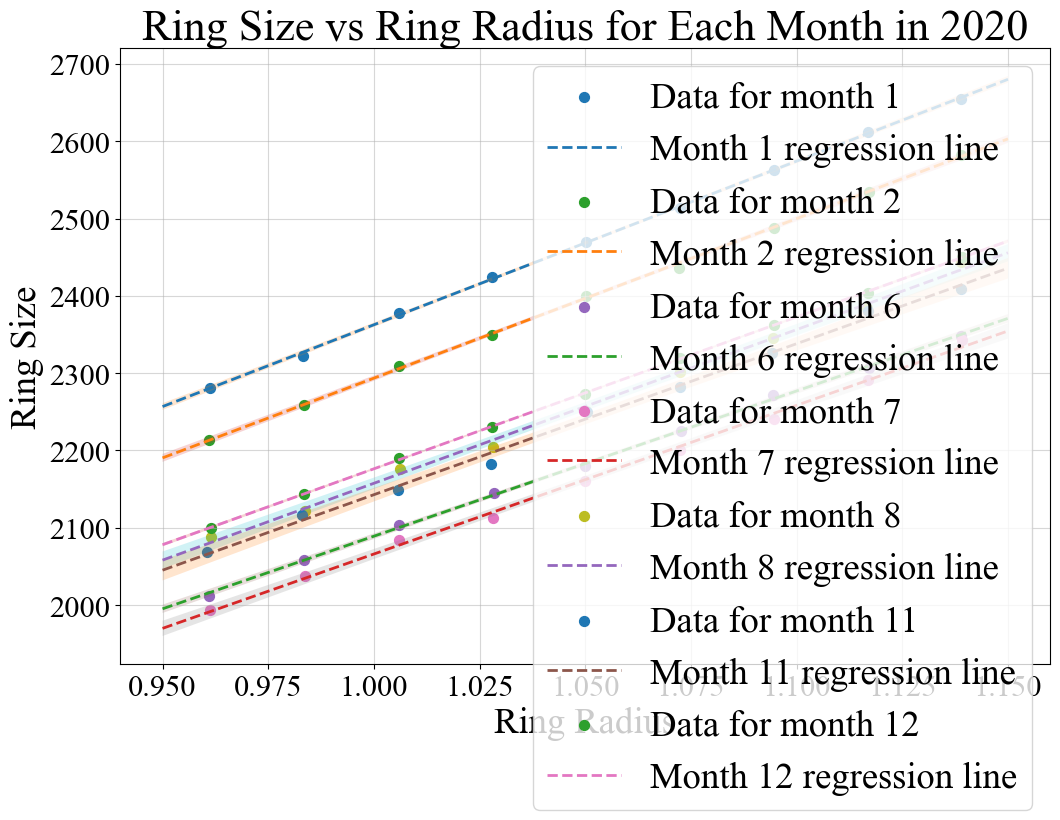

In [15]:

# Convert event_time to datetime
df_real_data_cut_2020['event_time'] = pd.to_datetime(df_real_data_cut_2020['event_time'], unit='s')

# Extract year and month from event_time
df_real_data_cut_2020['year'] = df_real_data_cut_2020['event_time'].dt.year
df_real_data_cut_2020['month'] = df_real_data_cut_2020['event_time'].dt.month

# Filter for the year 2022 (if not already filtered)
df_real_data_cut_2020 = df_real_data_cut_2020[df_real_data_cut_2020['year'] == 2020]

# Create a list of all months
all_months = range(1, 13)

# Define x_values for plotting
x_values = np.linspace(min_radius_cut, max_radius_cut, 100)  # adjust based on your data range
x_values_with_const = sm.add_constant(x_values)

plt.figure(figsize=(12, 8))

# Define bins
bins = np.linspace(min_radius_cut, max_radius_cut, 10)
mean_2020 = []
size_bin_2020 = []
for month in all_months:
    if month in df_real_data_cut_2020['month'].unique():
        data_run = df_real_data_cut_2020[df_real_data_cut_2020['month'] == month]
        # Bin the data for the current month
        data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)
        binned_run = data_run.groupby('binned_radius').agg({
            'ring_radius': 'mean',
            'ring_size': 'mean'
        })
        binned_run['constant'] = 1

        # Fit the model
        model_run = sm.OLS(binned_run['ring_size'], binned_run[['constant', 'ring_radius']]).fit()
        intercept = model_run.params['constant']
        y_values_run = model_run.predict(x_values_with_const)
        prediction_run = model_run.get_prediction(x_values_with_const)
        conf_int_run = prediction_run.conf_int()

        # Print the intercept for the current month
        #print(f'Intercept for month {month}: {intercept}')
        print(f'Value for the 1.05 deg in month {month} = {binned_run["ring_size"][7]}')
        mean_2020.append(binned_run["ring_size"].mean())
        size_bin_2020.append(binned_run["ring_size"][7])
        # Plotting
        plt.scatter(binned_run['ring_radius'], binned_run['ring_size'], label=f'Data for month {month}', s=50)
        plt.plot(x_values, y_values_run, linestyle='--', label=f'Month {month} regression line')
        plt.fill_between(x_values, conf_int_run[:, 0], conf_int_run[:, 1], alpha=0.2)
    else:
        print(f"No data for month {month}")

# Customize the plot
plt.xlabel('Ring Radius')
plt.ylabel('Ring Size')
plt.legend()
plt.title('Ring Size vs Ring Radius for Each Month in 2020')
plt.grid(alpha=0.5)
plt.show()

### Date for 2024 year

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/168343481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_data_cut_2024['event_time'] = pd.to_datetime(df_real_data_cut_2024['event_time'], unit='s')
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/168343481.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_data_cut_2024['year'] = df_real_data_cut_2024['event_time'].dt.year
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_1591/168343481.py:6: Sett

Value for the 1.05 deg in month 1 = 2260.12575025573
Value for the 1.05 deg in month 2 = 2248.5245143437946
Value for the 1.05 deg in month 3 = 2242.1774110006177
Value for the 1.05 deg in month 4 = 2232.528422140221
Value for the 1.05 deg in month 5 = 2240.2231675675675
Value for the 1.05 deg in month 6 = 2259.435733823611
Value for the 1.05 deg in month 7 = 2278.245083297909
No data for month 8
No data for month 9
No data for month 10
No data for month 11
No data for month 12


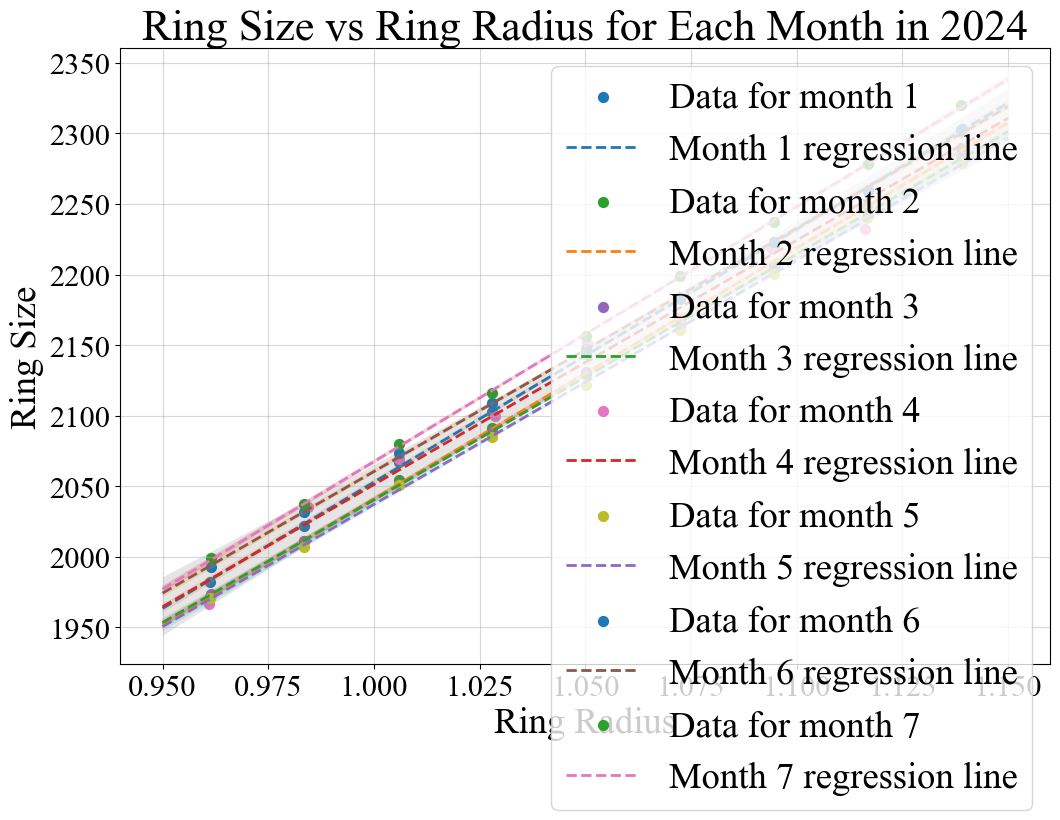

In [16]:

# Convert event_time to datetime
df_real_data_cut_2024['event_time'] = pd.to_datetime(df_real_data_cut_2024['event_time'], unit='s')

# Extract year and month from event_time
df_real_data_cut_2024['year'] = df_real_data_cut_2024['event_time'].dt.year
df_real_data_cut_2024['month'] = df_real_data_cut_2024['event_time'].dt.month

# Filter for the year 2022 (if not already filtered)
df_real_data_cut_2024 = df_real_data_cut_2024[df_real_data_cut_2024['year'] == 2024]

# Create a list of all months
all_months = range(1, 13)

# Define x_values for plotting
x_values = np.linspace(min_radius_cut, max_radius_cut, 100)  # adjust based on your data range
x_values_with_const = sm.add_constant(x_values)

plt.figure(figsize=(12, 8))

# Define bins
bins = np.linspace(min_radius_cut, max_radius_cut, 10)
mean_2024 = []
size_bin_2024 = []
for month in all_months:
    if month in df_real_data_cut_2024['month'].unique():
        data_run = df_real_data_cut_2024[df_real_data_cut_2024['month'] == month]
        # Bin the data for the current month
        data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)
        binned_run = data_run.groupby('binned_radius').agg({
            'ring_radius': 'mean',
            'ring_size': 'mean'
        })
        binned_run['constant'] = 1

        # Fit the model
        model_run = sm.OLS(binned_run['ring_size'], binned_run[['constant', 'ring_radius']]).fit()
        intercept = model_run.params['constant']
        y_values_run = model_run.predict(x_values_with_const)
        prediction_run = model_run.get_prediction(x_values_with_const)
        conf_int_run = prediction_run.conf_int()

        # Print the intercept for the current month
        #print(f'Intercept for month {month}: {intercept}')
        #print(f'mean for the month {month}: {binned_run["ring_size"].mean()}')
        print(f'Value for the 1.05 deg in month {month} = {binned_run["ring_size"][7]}')
        mean_2024.append(binned_run["ring_size"].mean())
        size_bin_2024.append(binned_run["ring_size"][7])
        # Plotting
        plt.scatter(binned_run['ring_radius'], binned_run['ring_size'], label=f'Data for month {month}', s=50)
        plt.plot(x_values, y_values_run, linestyle='--', label=f'Month {month} regression line')
        plt.fill_between(x_values, conf_int_run[:, 0], conf_int_run[:, 1], alpha=0.2)
    else:
        print(f"No data for month {month}")

# Customize the plot
plt.xlabel('Ring Radius')
plt.ylabel('Ring Size')
plt.legend()
plt.title('Ring Size vs Ring Radius for Each Month in 2024')
plt.grid(alpha=0.5)
plt.show()

### Mean ring size scan

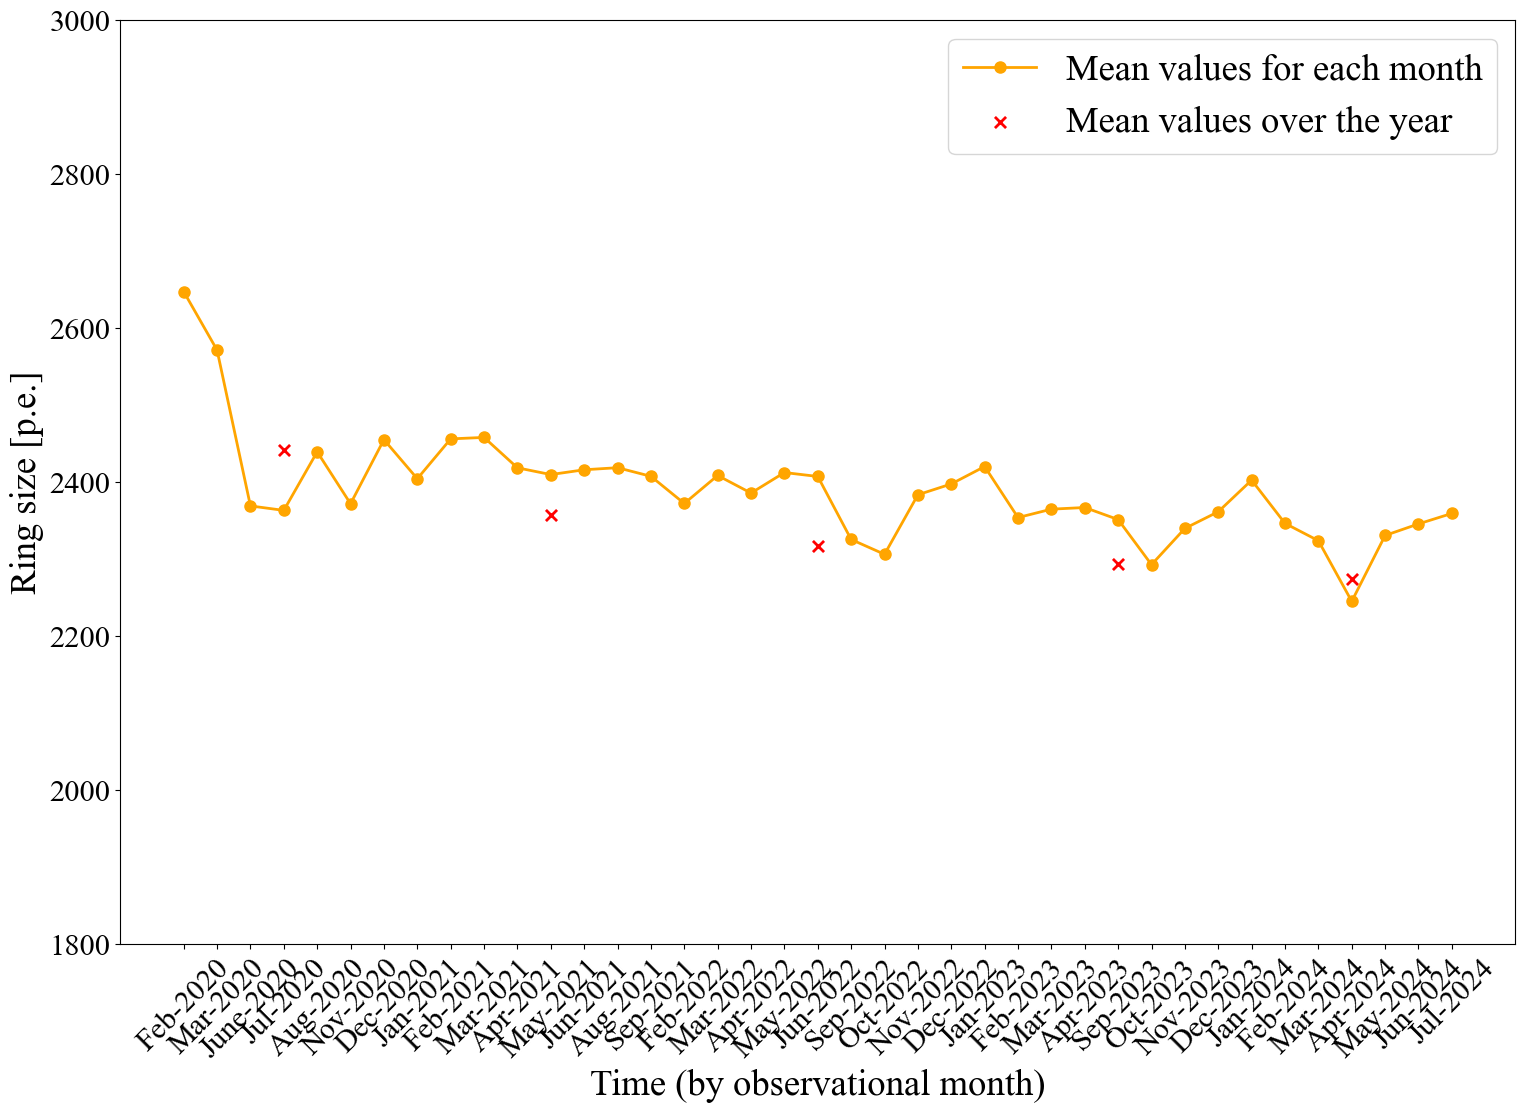

In [110]:
combined_means = mean_2020 + mean_2021 + mean_2022 + mean_2023 + mean_2024

mean_main = [2442,2358,2317,2294,2275]

# Create a list of time points
years = ['2020'] * len(mean_2020) + ['2021'] * len(mean_2021) + ['2022'] * len(mean_2022) + ['2023'] * len(mean_2023) + ['2024'] * len(mean_2024)

# Convert years to a numerical format if needed
time_points = list(range(len(combined_means)))
mean_main_positions = [
    len(mean_2020) // 2,
    len(mean_2020) + len(mean_2021) // 2,
    len(mean_2020) + len(mean_2021) + len(mean_2022) // 2,
    len(mean_2020) + len(mean_2021) + len(mean_2022) + len(mean_2023) // 2,
    len(mean_2020) + len(mean_2021) + len(mean_2022) + len(mean_2023) + len(mean_2024) // 2
]

# Corresponding months for each year's data
months_2020 = ['Feb', 'Mar', 'June', 'Jul', 'Aug', 'Nov', 'Dec']
months_2021 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Aug', 'Sep']
months_2022 = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Sep', 'Oct', 'Nov', 'Dec']
months_2023 = ['Jan', 'Feb', 'Mar', 'Apr', 'Sep', 'Oct', 'Nov', 'Dec']
months_2024 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul']

# Combine the month labels with the corresponding years
month_labels = (
    [f"{month}-2020" for month in months_2020] +
    [f"{month}-2021" for month in months_2021] +
    [f"{month}-2022" for month in months_2022] +
    [f"{month}-2023" for month in months_2023] +
    [f"{month}-2024" for month in months_2024]
)

# Plot the data
plt.figure(figsize=(18, 12))
plt.plot(time_points, np.array(combined_means), marker='o', linestyle='-', color='orange', label='Mean values for each month')
plt.scatter(mean_main_positions, mean_main, color='r',marker='x', label='Mean values over the year')    
plt.xlabel('Time (by observational month)')
plt.ylabel('Ring size [p.e.]')
plt.ylim(1800,3000)
#plt.title('Mean Values Over Time')
plt.xticks(time_points, month_labels, rotation=45)  # Set x-ticks to years
plt.legend()
#plt.grid(True)
#plt.show()
#plt.savefig(f'/Users/vdk/muons2024/images/AA_paper/2024tune_size_vs_radius_{year_value}year_cont{ring_containment_cut}_comp{ring_completeness_cut}.pdf', dpi=200, format='pdf', bbox_inches='tight')

## Relative efficiency vs absolute

In [17]:
size_mean_2022 = 1930.8 # completeness > 0.4
size_mean_2022 = 2071.8 # completeness > 0.5
size_mean_2022 = 2211.2 # completeness > 0.6
size_mean_2022 = 2305.3 # completeness > 0.7
# size_mean_2022 = 2373.2 # completeness > 0.8
# size_mean_2022 = 2440.7 # completeness > 0.9 
# size_mean_2022 = 2518.6  # completeness > 0.99
nominal_efficiency = 0.784
combined_sizes = np.array([size_bin_2020 + size_bin_2021 + size_bin_2022 + size_bin_2023 + size_bin_2024])
scale_factors = combined_sizes / size_mean_2022

relative_efficiency = scale_factors * nominal_efficiency
relative_efficiency
x_values = [i for i in range(len(relative_efficiency[0]))]
#plt.scatter(x_values, relative_efficiency[0])
#plt.plot(relative_efficiency[0])

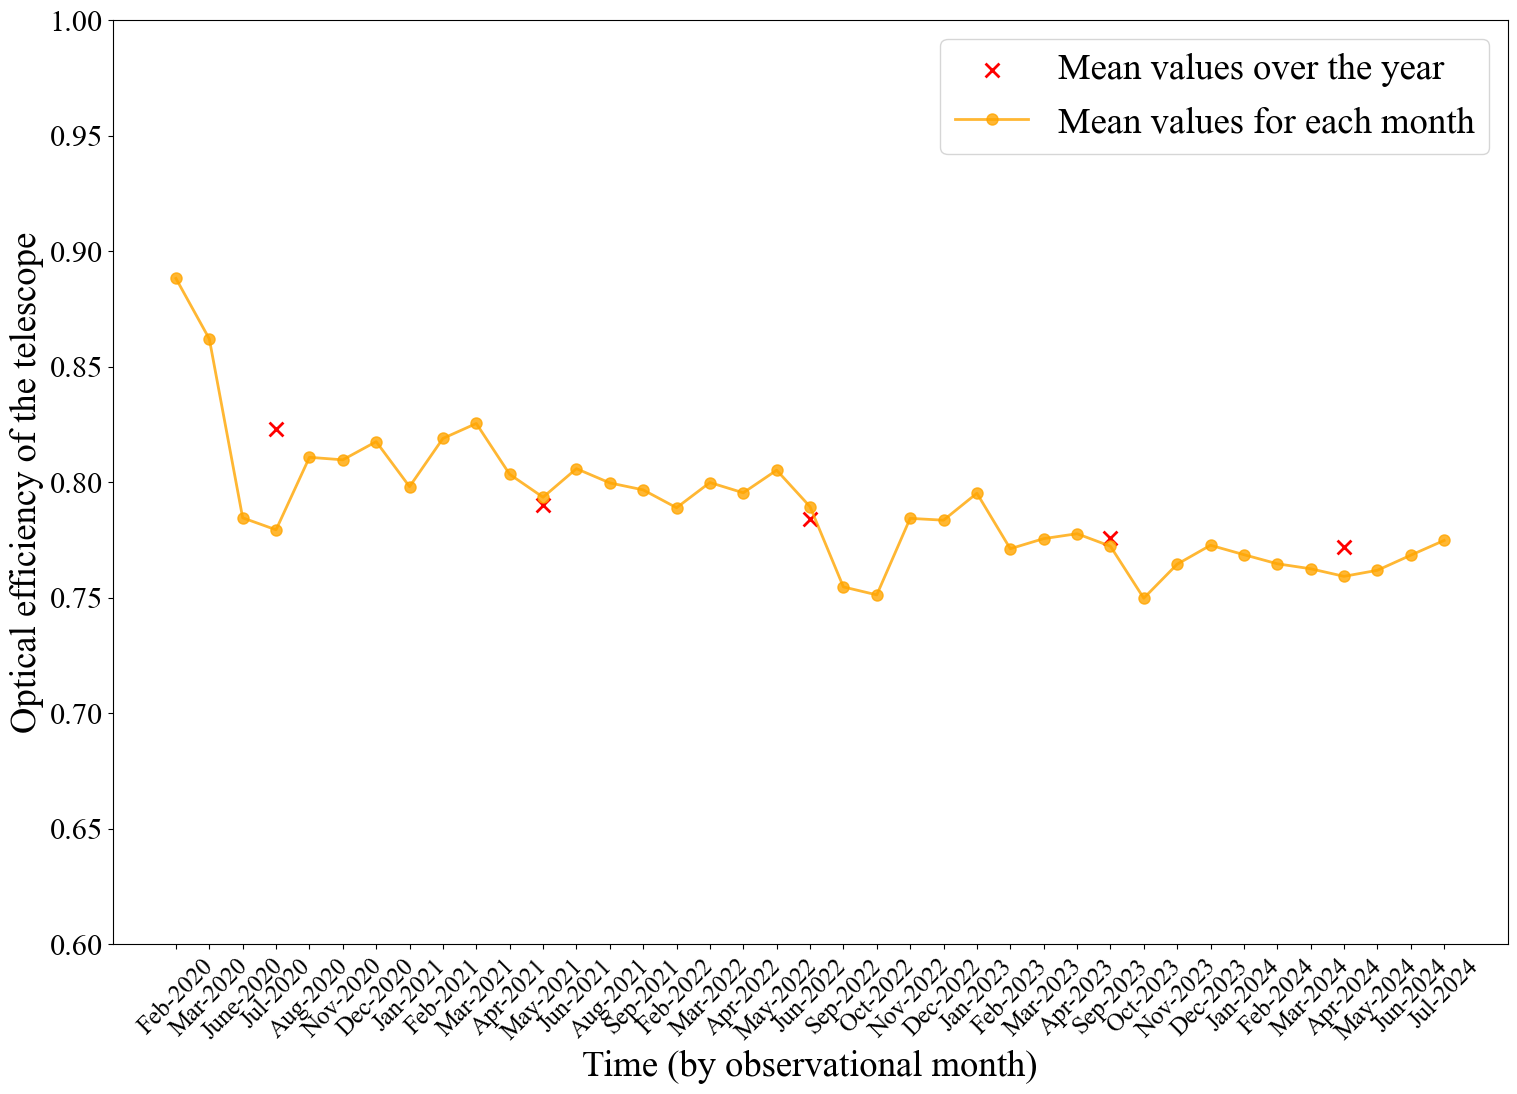

In [20]:
combined_means = relative_efficiency[0]

mean_main = [0.823, 0.79, 0.784, 0.776, 0.772]

# Create a list of time points
years = ['2020'] * len(mean_2020) + ['2021'] * len(mean_2021) + ['2022'] * len(mean_2022) + ['2023'] * len(mean_2023) + ['2024'] * len(mean_2024)

# Convert years to a numerical format if needed
time_points = list(range(len(combined_means)))
mean_main_positions = [
    len(mean_2020) // 2,
    len(mean_2020) + len(mean_2021) // 2,
    len(mean_2020) + len(mean_2021) + len(mean_2022) // 2,
    len(mean_2020) + len(mean_2021) + len(mean_2022) + len(mean_2023) // 2,
    len(mean_2020) + len(mean_2021) + len(mean_2022) + len(mean_2023) + len(mean_2024) // 2
]

# Corresponding months for each year's data
# months_2020 = ['Feb', 'Mar', 'June', 'Jul', 'Aug', 'Nov', 'Dec']
# months_2021 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Aug', 'Sep']
# months_2022 = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Sep', 'Oct', 'Nov', 'Dec']
# months_2023 = ['Jan', 'Feb', 'Mar', 'Apr', 'Sep', 'Oct', 'Nov', 'Dec']
# months_2024 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul']

months_2020 = ['Feb', 'Mar', 'June', 'Jul', 'Aug', 'Nov', 'Dec']
months_2021 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Aug', 'Sep']
months_2022 = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Sep', 'Oct', 'Nov', 'Dec']
months_2023 = ['Jan', 'Feb', 'Mar', 'Apr', 'Sep', 'Oct', 'Nov', 'Dec']
months_2024 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul']

# Combine the month labels with the corresponding years
month_labels = (
    [f"{month}-2020" for month in months_2020] +
    [f"{month}-2021" for month in months_2021] +
    [f"{month}-2022" for month in months_2022] +
    [f"{month}-2023" for month in months_2023] +
    [f"{month}-2024" for month in months_2024]
)


# Plot the data
plt.figure(figsize=(18, 12))
plt.scatter(mean_main_positions, mean_main, color='r',marker='x',s=100, label='Mean values over the year')    
plt.plot(time_points, np.array(combined_means), marker='o', linestyle='-', color='orange', label='Mean values for each month',alpha=0.8)
plt.xlabel('Time (by observational month)')
plt.ylabel('Optical efficiency of the telescope')
plt.ylim(0.6,1)
#plt.title('Mean Values Over Time')
plt.xticks(time_points, month_labels, rotation=45, fontsize = 18)  # Set x-ticks to years
plt.legend()
#plt.grid(True)
#plt.show()
#plt.savefig(f'/Users/vdk/muons2024/images/AA_paper/relative_efficiency_scan/smaller_xticks/shortYlim_abs_vs_rel_efficiency_comp{ring_completeness_cut}.pdf', dpi=200, format='pdf', bbox_inches='tight')

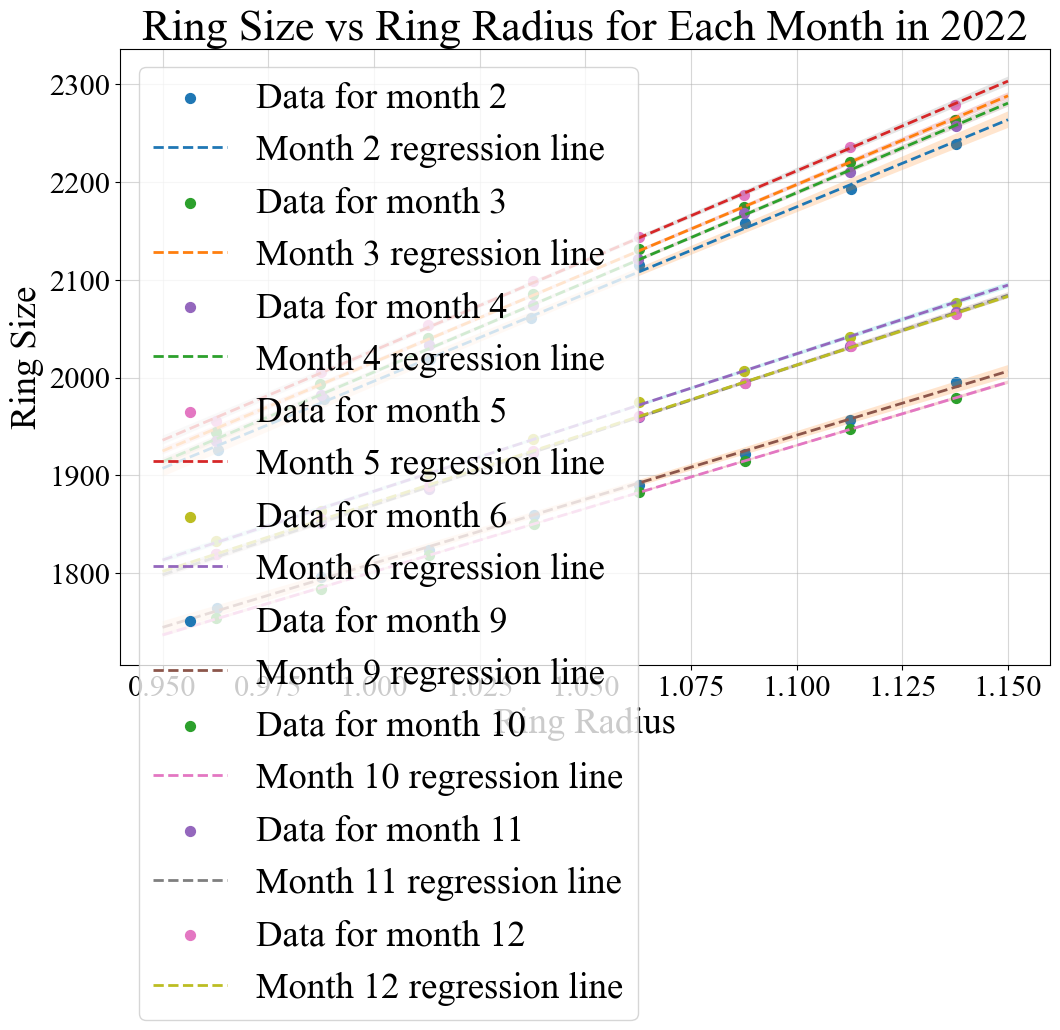

In [534]:
# Assume df_real_data_cut_2022 is your DataFrame with event_time for the year 2022

# Convert event_time to datetime
df_real_data_cut_2022['event_time'] = pd.to_datetime(df_real_data_cut_2022['event_time'], unit='s')

# Extract year and month from event_time
df_real_data_cut_2022['year'] = df_real_data_cut_2022['event_time'].dt.year
df_real_data_cut_2022['month'] = df_real_data_cut_2022['event_time'].dt.month

# Filter for the year 2022 (if not already filtered)
df_real_data_cut_2022 = df_real_data_cut_2022[df_real_data_cut_2022['year'] == 2022]

# Group by month
grouped = df_real_data_cut_2022.groupby('month')

# x_values should be predefined, here is an example
x_values = np.linspace(0.95, 1.15, 100)  # adjust based on your data range
x_values_with_const = sm.add_constant(x_values)

plt.figure(figsize=(12, 8))

# Define bins
bins = np.linspace(0.95, 1.15, 9)

for month, group in grouped:
    data_run = group
    # Bin the data for the current month
    data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)
    binned_run = data_run.groupby('binned_radius').agg({
        'ring_radius': 'mean',
        'ring_size': 'mean'
    })
    binned_run['constant'] = 1
    
    # Fit the model
    model_run = sm.OLS(binned_run['ring_size'], binned_run[['constant', 'ring_radius']]).fit()
    y_values_run = model_run.predict(x_values_with_const)
    prediction_run = model_run.get_prediction(x_values_with_const)
    conf_int_run = prediction_run.conf_int()
    
    # Plotting
    plt.scatter(binned_run['ring_radius'], binned_run['ring_size'], label=f'Data for month {month}', s=50)
    plt.plot(x_values, y_values_run, linestyle='--', label=f'Month {month} regression line')
    plt.fill_between(x_values, conf_int_run[:, 0], conf_int_run[:, 1], alpha=0.2)

# Customize the plot
plt.xlabel('Ring Radius')
plt.ylabel('Ring Size')
plt.legend()
plt.title('Ring Size vs Ring Radius for Each Month in 2022')
plt.grid(alpha=0.5)
plt.show()

No data for month 1


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_15730/1646653454.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_15730/1646653454.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipy

No data for month 7
No data for month 8


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_15730/1646653454.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_15730/1646653454.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipy

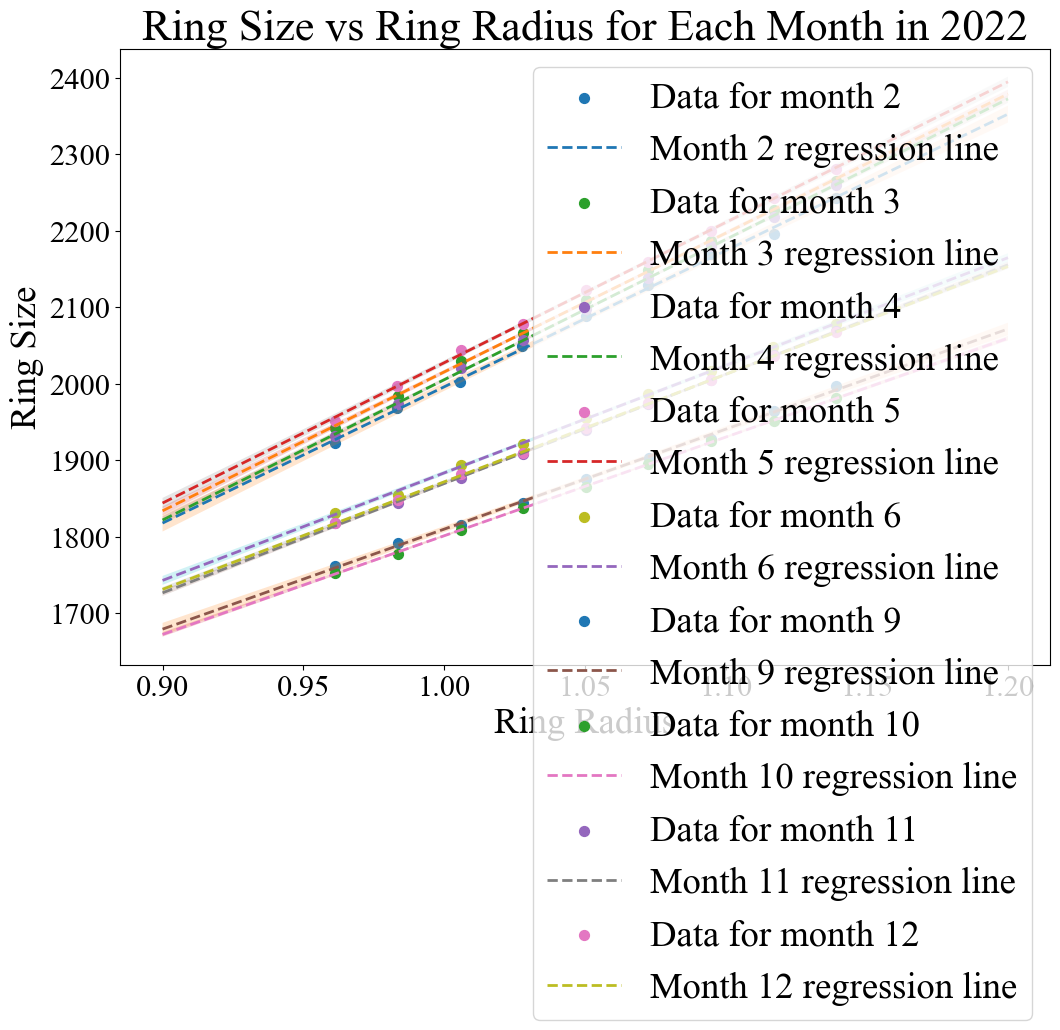

In [535]:

import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Assume df_real_data_cut_2022 is your DataFrame with event_time for the year 2022

# Convert event_time to datetime
df_real_data_cut_2022['event_time'] = pd.to_datetime(df_real_data_cut_2022['event_time'], unit='s')

# Extract year and month from event_time
df_real_data_cut_2022['year'] = df_real_data_cut_2022['event_time'].dt.year
df_real_data_cut_2022['month'] = df_real_data_cut_2022['event_time'].dt.month

# Filter for the year 2022 (if not already filtered)
df_real_data_cut_2022 = df_real_data_cut_2022[df_real_data_cut_2022['year'] == 2022]

# Create a list of all months
all_months = range(1, 13)

# Define x_values for plotting
x_values = np.linspace(0.9, 1.2, 100)  # adjust based on your data range
x_values_with_const = sm.add_constant(x_values)

plt.figure(figsize=(12, 8))

# Define bins
bins = np.linspace(df_real_data_cut_2022['ring_radius'].min(), df_real_data_cut_2022['ring_radius'].max(), 10)

for month in all_months:
    if month in df_real_data_cut_2022['month'].unique():
        data_run = df_real_data_cut_2022[df_real_data_cut_2022['month'] == month]
        # Bin the data for the current month
        data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)
        binned_run = data_run.groupby('binned_radius').agg({
            'ring_radius': 'mean',
            'ring_size': 'mean'
        })
        binned_run['constant'] = 1

        # Fit the model
        model_run = sm.OLS(binned_run['ring_size'], binned_run[['constant', 'ring_radius']]).fit()
        y_values_run = model_run.predict(x_values_with_const)
        prediction_run = model_run.get_prediction(x_values_with_const)
        conf_int_run = prediction_run.conf_int()

        # Plotting
        plt.scatter(binned_run['ring_radius'], binned_run['ring_size'], label=f'Data for month {month}', s=50)
        plt.plot(x_values, y_values_run, linestyle='--', label=f'Month {month} regression line')
        plt.fill_between(x_values, conf_int_run[:, 0], conf_int_run[:, 1], alpha=0.2)
    else:
        print(f"No data for month {month}")

# Customize the plot
plt.xlabel('Ring Radius')
plt.ylabel('Ring Size')
plt.legend()
plt.title('Ring Size vs Ring Radius for Each Month in 2022')
plt.show()